# Coffee House Customer Retention

## Data Cleaning

### Import Libraries

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_excel("./data/coffee-house-satisfactory-survey.xlsx")
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [3]:
df.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How 

In [4]:
# Renaming column names
df.rename(columns={
    '1. Your Gender': 'gender', 
    '2. Your Age': 'age', 
    '3. Are you currently....?': 'employment status',
    '4. What is your annual income?': 'annual income',
    '5. How often do you visit Coffee House?': 'coffee visits',
    '6. How do you usually enjoy Coffee House?': 'mode',
    '7. How much time do you normally  spend during your visit?': 'time spent',
    "8. The nearest Coffee House's outlet to you is...?": 'distance',
    '9. Do you have Coffee House membership card?': 'membership',
    '10. What do you most frequently purchase at Coffee House?': 'frequent purchase',
    '11. On average, how much would you spend at Coffee House per visit?': 'avg. spent',
    '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:': 'quality',
    '13. How would you rate the price range at Coffee House?': 'price',
    '14. How important are sales and promotions in your purchase decision?': 'promotion',
    '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)': 'ambiance',
    '16. You rate the WiFi quality at Coffee House as..': 'wifi',
    '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)': 'service',
    '18. How likely you will choose Coffee House for doing business meetings or hangout with friends?': 'meetups',
    '19. How do you come to hear of promotions at Coffee House? Check all that apply.': 'referrals',
    '20. Will you continue buying Coffee House?': 'satisfied'}, inplace=True)

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          122 non-null    object
 1   gender             122 non-null    object
 2   age                122 non-null    object
 3   employment status  122 non-null    object
 4   annual income      122 non-null    object
 5   coffee visits      122 non-null    object
 6   mode               121 non-null    object
 7   time spent         122 non-null    object
 8   distance           122 non-null    object
 9   membership         122 non-null    object
 10  frequent purchase  122 non-null    object
 11  avg. spent         122 non-null    object
 12  quality            122 non-null    int64 
 13  price              122 non-null    int64 
 14  promotion          122 non-null    int64 
 15  ambiance           122 non-null    int64 
 16  wifi               122 non-null    int64 
 1

- There are 21 columns with 122 rows
- All of the columns except `Timestamp` are categorical

In [6]:
# Converting `Timestamp` to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

/var/folders/l3/lsbx8rqj4l7g6lrqngmr10940000gn/T/ipykernel_3640/4188351216.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [7]:
df.isna().sum()

Timestamp            0
gender               0
age                  0
employment status    0
annual income        0
coffee visits        0
mode                 1
time spent           0
distance             0
membership           0
frequent purchase    0
avg. spent           0
quality              0
price                0
promotion            0
ambiance             0
wifi                 0
service              0
meetups              0
referrals            1
satisfied            0
dtype: int64

In [8]:
df[df['mode'].isna()]

,Timestamp,gender,age,employment status,annual income,coffee visits,mode,time spent,distance,membership,...,avg. spent,quality,price,promotion,ambiance,wifi,service,meetups,referrals,satisfied
81,2019-10-03 09:11:28-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Never,NaN,Below 30 minutes,more than 3km,No,...,Zero,1,1,1,3,3,3,3,NaN,No


This entry has both `mode` and `referrals` as null

In [9]:
# Removing this entry
df.dropna(axis=0, inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicated entries

In [11]:
for col in df.columns:
    unq = df[col].unique()
    print(col, unq, len(unq))

Timestamp <DatetimeArray>
['2019-10-01 12:38:43-08:00', '2019-10-01 12:38:54-08:00',
 '2019-10-01 12:38:56-08:00', '2019-10-01 12:39:08-08:00',
 '2019-10-01 12:39:20-08:00', '2019-10-01 12:39:39-08:00',
 '2019-10-01 12:39:42-08:00', '2019-10-01 12:40:58-08:00',
 '2019-10-01 12:42:27-08:00', '2019-10-01 12:43:36-08:00',
 ...
 '2019-10-03 19:58:17-08:00', '2019-10-03 20:58:26-08:00',
 '2019-10-03 21:25:36-08:00', '2019-10-03 22:38:42-08:00',
 '2019-10-03 23:24:55-08:00', '2019-10-04 00:24:26-08:00',
 '2019-10-04 09:30:09-08:00', '2019-10-04 13:46:07-08:00',
 '2019-10-05 11:01:14-08:00', '2019-10-05 16:57:22-08:00']
Length: 121, dtype: datetime64[ns, UTC-08:00] 121
gender ['Female' 'Male'] 2
age ['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20'] 4
employment status ['Student' 'Employed' 'Self-employed' 'Housewife'] 4
annual income ['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000'] 5
coffee visits ['Rarely' 'Monthly' 

### Univariate Analysis

#### Timestamp

In [12]:
df['Timestamp'].duplicated().sum()

np.int64(0)

All timestamps are unqiue

In [34]:
# Drop timestamp
df.drop('Timestamp', axis=1, inplace=True)

#### Gender

gender        Female      Male
count       65.00000  56.00000
proportion   0.53719   0.46281


<Axes: xlabel='gender', ylabel='count'>

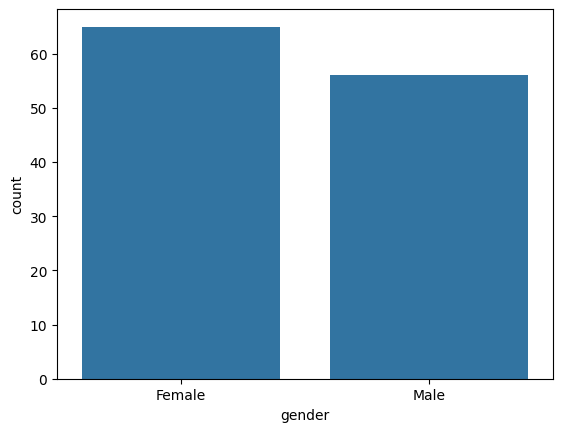

In [13]:
print(pd.DataFrame(data=[df['gender'].value_counts(), df['gender'].value_counts(normalize=True)]))
sns.countplot(data=df, x='gender')

- There are 65(53%) Females and 56(46%) Males
- The distribution can be said to be balanced.

#### Age

age         From 20 to 29  From 30 to 39   Below 20  40 and above
count           84.000000      17.000000  13.000000      7.000000
proportion       0.694215       0.140496   0.107438      0.057851


<Axes: xlabel='age', ylabel='count'>

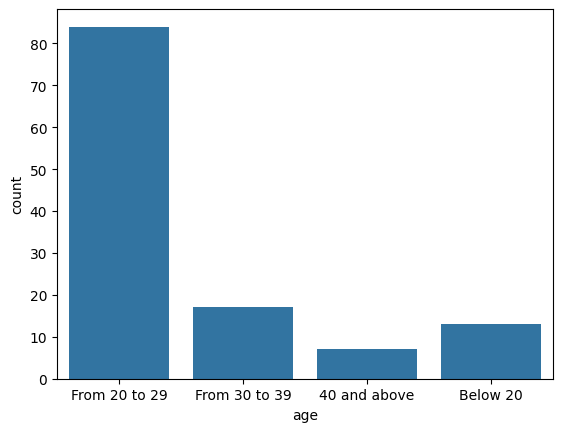

In [14]:
print(pd.DataFrame(data=[df['age'].value_counts(), df['age'].value_counts(normalize=True)]))
sns.countplot(data=df, x='age')

- Around 69% of people belong from age groun 20 to 29.
- People above 40 age group that took the survey are few (5.7%)

#### Employment Status

employment status   Employed    Student  Self-employed  Housewife
count              60.000000  42.000000      17.000000   2.000000
proportion          0.495868   0.347107       0.140496   0.016529


<Axes: xlabel='employment status', ylabel='count'>

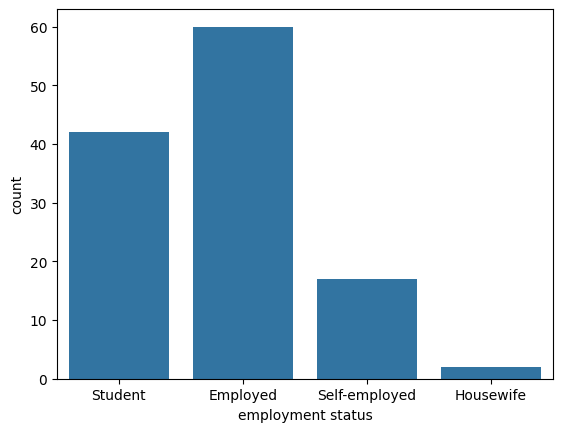

In [15]:
print(pd.DataFrame(data=[df['employment status'].value_counts(), df['employment status'].value_counts(normalize=True)]))
sns.countplot(data=df, x='employment status')

- Aroung 49% of people that took the survey are Employed
- Next comes Students at 37%

#### Annual Income

annual income  Less than RM25,000  RM25,000 - RM50,000  RM50,000 - RM100,000  \
count                   70.000000            25.000000             17.000000   
proportion               0.578512             0.206612              0.140496   

annual income  More than RM150,000  RM100,000 - RM150,000  
count                     6.000000               3.000000  
proportion                0.049587               0.024793  


<Axes: xlabel='annual income', ylabel='count'>

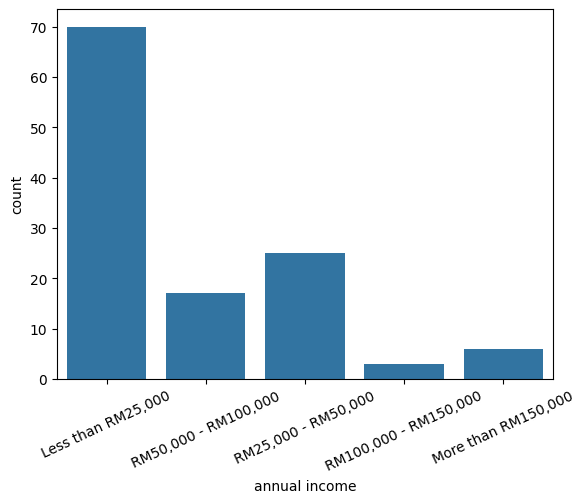

In [16]:
print(pd.DataFrame(data=[df['annual income'].value_counts(), df['annual income'].value_counts(normalize=True)]))
plt.xticks(rotation=25)
sns.countplot(data=df, x='annual income')

- People earning less than RM25,000 took the most survey (57%)
- High earning individuals in the bracket RM100,000 - RM150,000 contribute to only 2.4% of the survey taken

#### Coffee Visits

coffee visits     Rarely    Monthly   Weekly     Never     Daily
count          76.000000  26.000000  9.00000  8.000000  2.000000
proportion      0.628099   0.214876  0.07438  0.066116  0.016529


<Axes: xlabel='coffee visits', ylabel='count'>

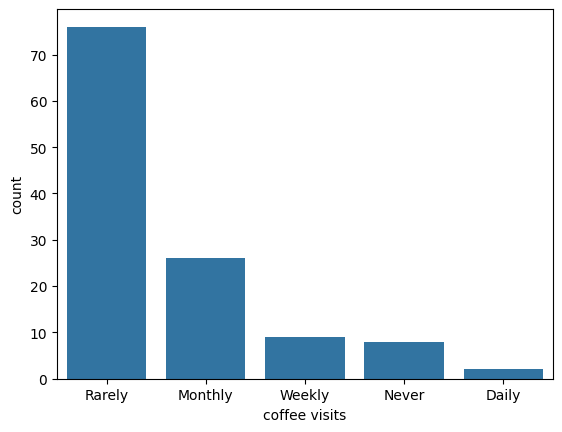

In [17]:
print(pd.DataFrame(data=[df['coffee visits'].value_counts(), df['coffee visits'].value_counts(normalize=True)]))
sns.countplot(data=df, x='coffee visits')

- 62% of the people visit coffee shops rarely
- 1.65% of the people visit coffee shops daily

#### Mode

mode        Take away    Dine in  Drive-thru     never     Never  Never buy  \
count       49.000000  46.000000   20.000000  2.000000  2.000000   1.000000   
proportion   0.404959   0.380165    0.165289  0.016529  0.016529   0.008264   

mode        I dont like coffee  
count                 1.000000  
proportion            0.008264  


<Axes: xlabel='mode', ylabel='count'>

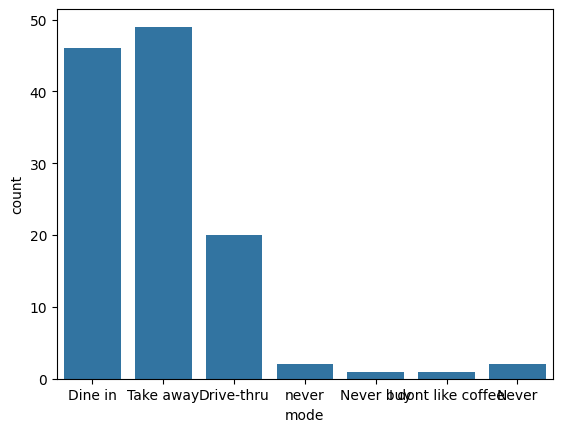

In [18]:
print(pd.DataFrame(data=[df['mode'].value_counts(), df['mode'].value_counts(normalize=True)]))
sns.countplot(data=df, x='mode')

Here 'never', 'Never buy', 'I dont like coffee' and 'Never' has the same emotion behind it. So we consolidate them all.

In [19]:
df.loc[df['mode'] == 'never', 'mode'] = 'Never'
df.loc[df['mode'] == 'Never buy', 'mode'] = 'Never'
df.loc[df['mode'] == 'I dont like coffee', 'mode'] = 'Never'
df.loc[df['mode'] == 'Never', 'mode'] = 'Never'

40% of the coffee orders are Take aways

#### Time Spent

time spent  Below 30 minutes  Between 30 minutes to 1 hour  \
count              72.000000                     34.000000   
proportion          0.595041                      0.280992   

time spent  Between 1 hour to 2 hours  More than 3 hours  \
count                       12.000000           2.000000   
proportion                   0.099174           0.016529   

time spent  Between 2 hours to 3 hours  
count                         1.000000  
proportion                    0.008264  


<Axes: xlabel='time spent', ylabel='count'>

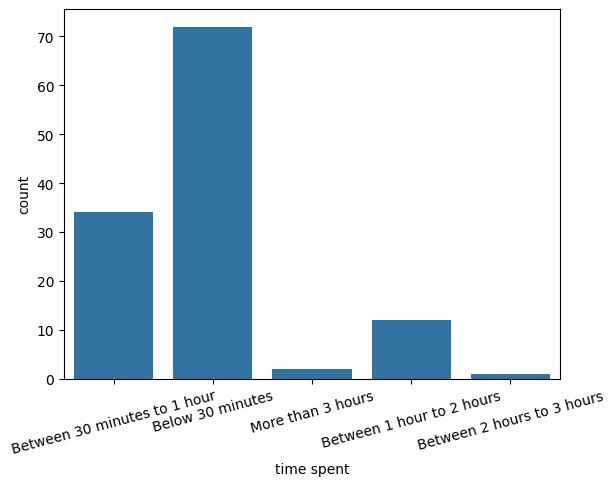

In [20]:
print(pd.DataFrame(data=[df['time spent'].value_counts(), df['time spent'].value_counts(normalize=True)]))
plt.xticks(rotation=15)
sns.countplot(data=df, x='time spent')

Consolidating all brackets more than 1 hour, Since the proportion of people in those brackets is very less

In [21]:
df.loc[df['time spent'] == 'Between 1 hour to 2 hours', 'time spent'] = 'More than 1 hour'
df.loc[df['time spent'] == 'Between 2 hours to 3 hours', 'time spent'] = 'More than 1 hour'
df.loc[df['time spent'] == 'More than 3 hours', 'time spent'] = 'More than 1 hour'

Around 60% of people spend less than 30 minutes on every visit

#### Distance

distance    more than 3km  1km - 3km  within 1km
count           60.000000  34.000000    27.00000
proportion       0.495868   0.280992     0.22314


<Axes: xlabel='distance', ylabel='count'>

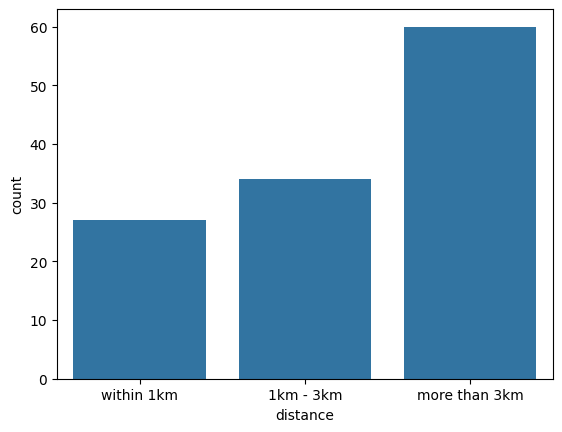

In [22]:
print(pd.DataFrame(data=[df['distance'].value_counts(), df['distance'].value_counts(normalize=True)]))
sns.countplot(data=df, x='distance')

Around 22% of have coffee shop within 1km of their range

#### Membership

membership         No        Yes
count       61.000000  60.000000
proportion   0.504132   0.495868


<Axes: xlabel='membership', ylabel='count'>

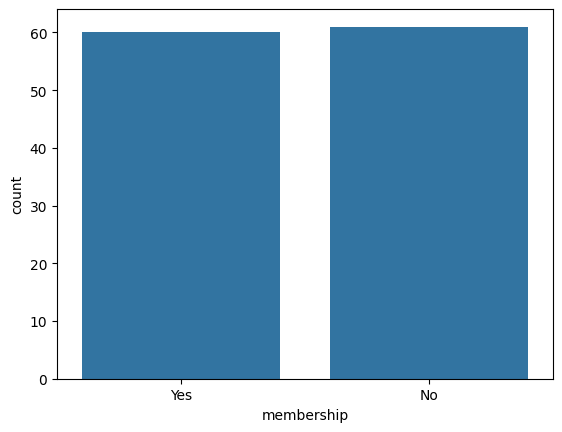

In [23]:
print(pd.DataFrame(data=[df['membership'].value_counts(), df['membership'].value_counts(normalize=True)]))
sns.countplot(data=df, x='membership')

The `membership` column is equally balanced

#### Frequent Purchase

frequent purchase    Coffee  Cold drinks  Coffee;Pastries  Coffee;Cold drinks  \
count              65.00000    25.000000         6.000000            6.000000   
proportion          0.53719     0.206612         0.049587            0.049587   

frequent purchase  Coffee;Sandwiches  Pastries  Cold drinks;Juices;Pastries  \
count                       3.000000  2.000000                     2.000000   
proportion                  0.024793  0.016529                     0.016529   

frequent purchase  Coffee;Pastries;Sandwiches  \
count                                1.000000   
proportion                           0.008264   

frequent purchase  Coffee;Juices;Pastries;Sandwiches  Cold drinks;Pastries  \
count                                       1.000000              1.000000   
proportion                                  0.008264              0.008264   

frequent purchase  Coffee;Cold drinks;Pastries;Sandwiches     Never  \
count                                            1.000000  1.000

<Axes: xlabel='frequent purchase', ylabel='count'>

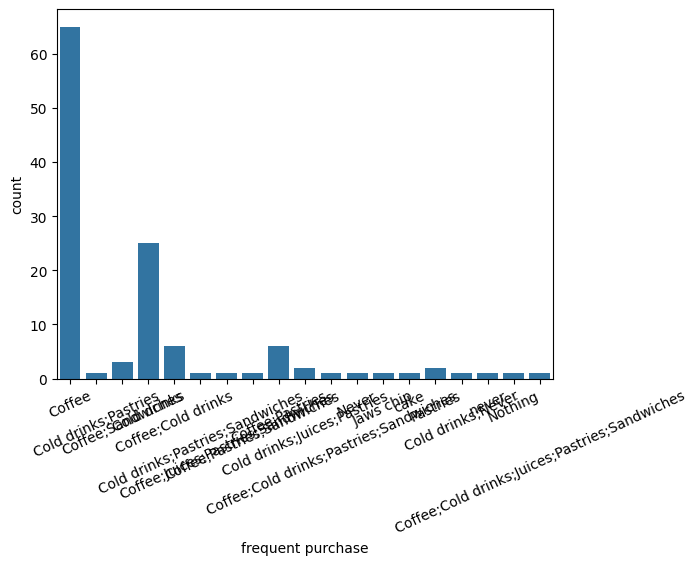

In [24]:
print(pd.DataFrame(data=[df['frequent purchase'].value_counts(), df['frequent purchase'].value_counts(normalize=True)]))
plt.xticks(rotation=25)
sns.countplot(data=df, x='frequent purchase')

- Since this is a survey for coffee shop, it make sense coffee to be the most frequent purchase.
- The frequency for other categories in this column is very very negligible and can be considered as an outlier.
- Hence we choose to drop this column.

In [25]:
df.drop('frequent purchase', axis=1, inplace=True)

#### Avg. Spent

avg. spent  Less than RM20  Around RM20 - RM40       Zero  More than RM40
count            58.000000           45.000000  11.000000        7.000000
proportion        0.479339            0.371901   0.090909        0.057851


<Axes: xlabel='avg. spent', ylabel='count'>

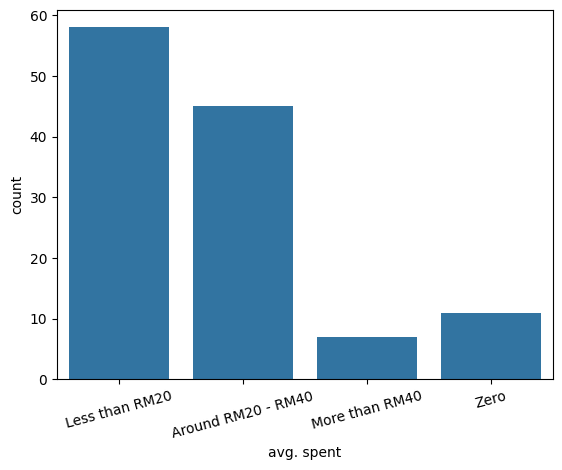

In [26]:
print(pd.DataFrame(data=[df['avg. spent'].value_counts(), df['avg. spent'].value_counts(normalize=True)]))
plt.xticks(rotation=15)
sns.countplot(data=df, x='avg. spent')

Since Zero falls under the bracket of Less than RM20. We concolidate both categories

In [27]:
df.loc[df['avg. spent'] == 'Zero', 'avg. spent'] = 'Less than RM20'

- Around 57% of people spend less than RM20 on average
- Around 5.78% of people spend more than RM40 on average

#### Quality, Price, Promotion, Ambiance, Wifi, Service and Meetups

quality             4          3          5         2         1
count       49.000000  39.000000  23.000000  8.000000  2.000000
proportion   0.404959   0.322314   0.190083  0.066116  0.016529
price               3         2          4          1        5
count       48.000000  27.00000  24.000000  13.000000  9.00000
proportion   0.396694   0.22314   0.198347   0.107438  0.07438
promotion           4          5          3         2         1
count       42.000000  37.000000  30.000000  7.000000  5.000000
proportion   0.347107   0.305785   0.247934  0.057851  0.041322
ambiance            4          3          5         2         1
count       52.000000  34.000000  26.000000  6.000000  3.000000
proportion   0.429752   0.280992   0.214876  0.049587  0.024793
wifi                3         4          2          5         1
count       53.000000  38.00000  13.000000  10.000000  7.000000
proportion   0.438017   0.31405   0.107438   0.082645  0.057851
service             4          3          5

<Axes: xlabel='meetups', ylabel='count'>

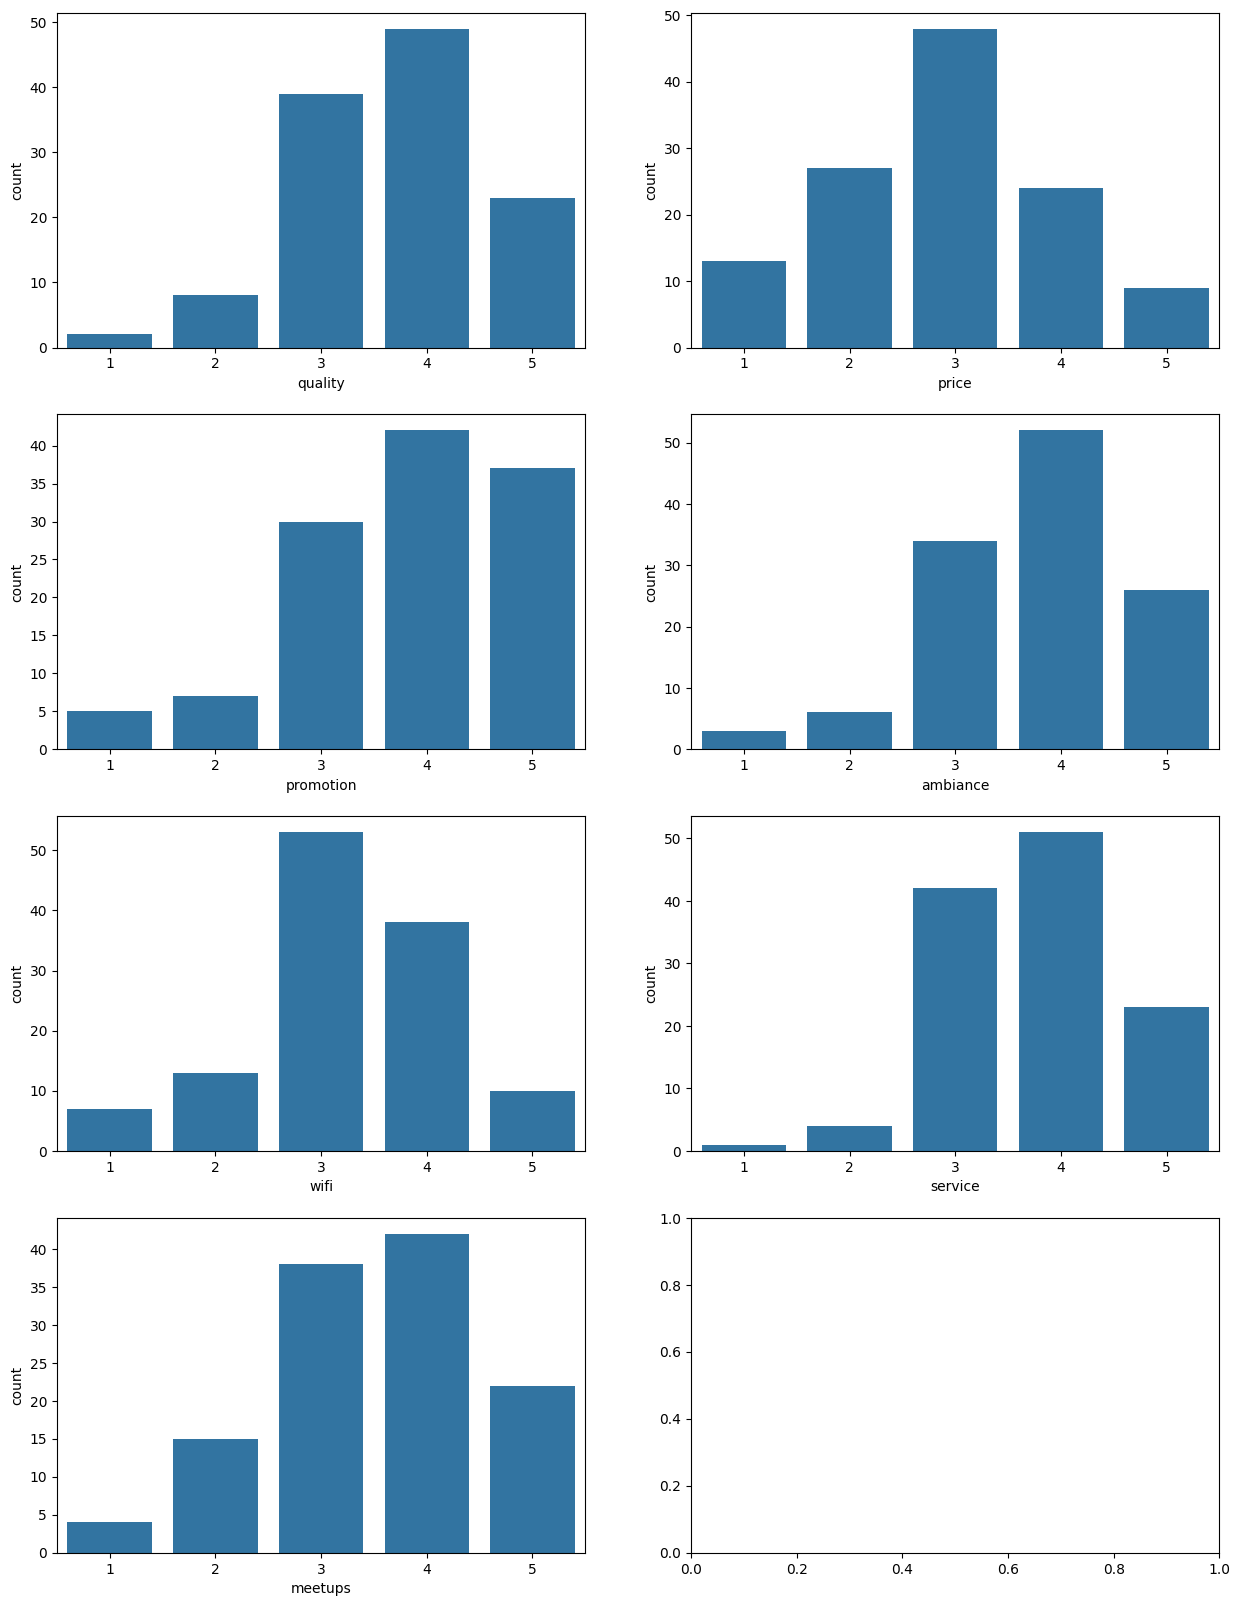

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

print(pd.DataFrame(data=[df['quality'].value_counts(), df['quality'].value_counts(normalize=True)]))
sns.countplot(data=df, x='quality', ax=axs[0][0])

print(pd.DataFrame(data=[df['price'].value_counts(), df['price'].value_counts(normalize=True)]))
sns.countplot(data=df, x='price', ax=axs[0][1])

print(pd.DataFrame(data=[df['promotion'].value_counts(), df['promotion'].value_counts(normalize=True)]))
sns.countplot(data=df, x='promotion', ax=axs[1][0])

print(pd.DataFrame(data=[df['ambiance'].value_counts(), df['ambiance'].value_counts(normalize=True)]))
sns.countplot(data=df, x='ambiance', ax=axs[1][1])

print(pd.DataFrame(data=[df['wifi'].value_counts(), df['wifi'].value_counts(normalize=True)]))
sns.countplot(data=df, x='wifi', ax=axs[2][0])

print(pd.DataFrame(data=[df['service'].value_counts(), df['service'].value_counts(normalize=True)]))
sns.countplot(data=df, x='service', ax=axs[2][1])

print(pd.DataFrame(data=[df['meetups'].value_counts(), df['meetups'].value_counts(normalize=True)]))
sns.countplot(data=df, x='meetups', ax=axs[3][0])

#### Referrals

referrals   Social Media  Social Media;Through friends and word of mouth  \
count          31.000000                                       14.000000   
proportion      0.256198                                        0.115702   

referrals   Through friends and word of mouth  \
count                                 9.00000   
proportion                            0.07438   

referrals   Starbucks Website/Apps;Social Media  In Store displays  \
count                                   9.00000           7.000000   
proportion                              0.07438           0.057851   

referrals   Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth  \
count                                                6.000000                              
proportion                                           0.049587                              

referrals   Starbucks Website/Apps;Social Media;Through friends and word of mouth  \
count                                             

<Axes: xlabel='referrals', ylabel='count'>

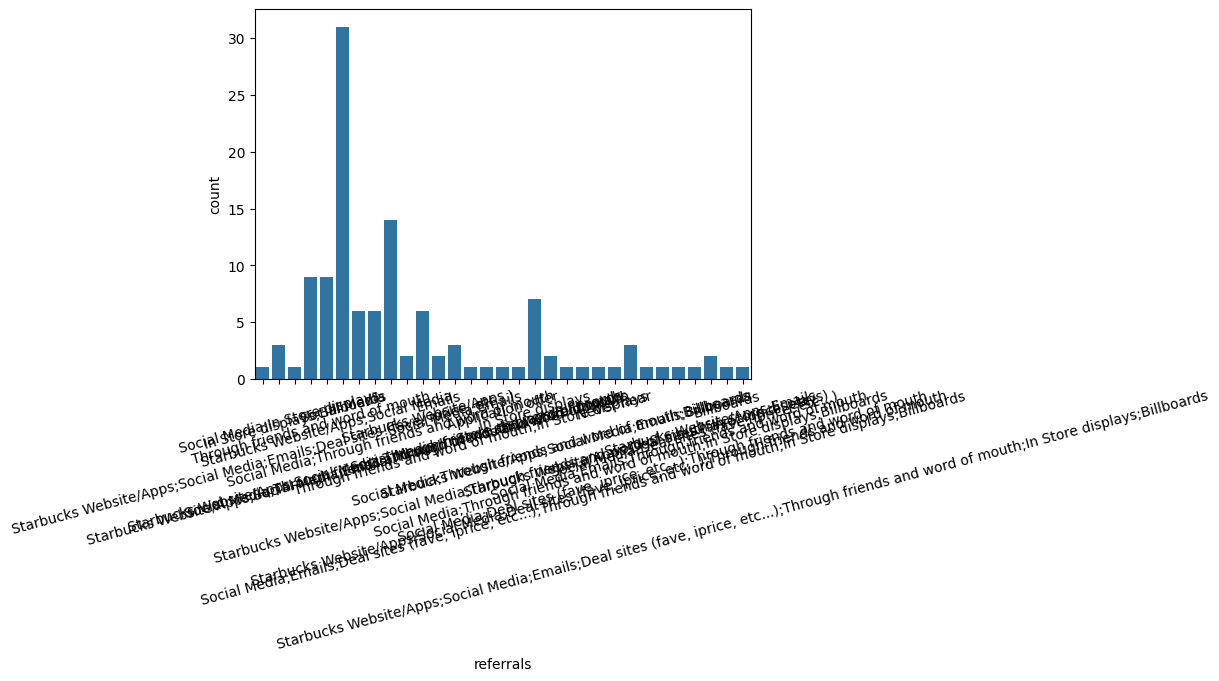

In [29]:
print(pd.DataFrame(data=[df['referrals'].value_counts(), df['referrals'].value_counts(normalize=True)]))
plt.xticks(rotation=15)
sns.countplot(data=df, x='referrals')

- For this specific problem of customer retention, `referrals` columns seems unrelated.
- The purpose of referrals mostly is to bring in new customers
- Hence we decide to remove this column.

In [30]:
df.drop('referrals', axis=1, inplace=True)

#### Satisfied

satisfied        Yes        No
count       94.00000  27.00000
proportion   0.77686   0.22314


<Axes: xlabel='satisfied', ylabel='count'>

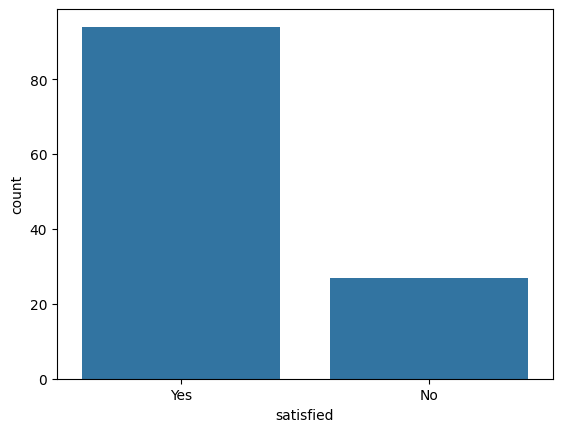

In [31]:
print(pd.DataFrame(data=[df['satisfied'].value_counts(), df['satisfied'].value_counts(normalize=True)]))
sns.countplot(data=df, x='satisfied')

- Around 77% of people are satisfied and would come back.
- Around 22% of people are not satisfied and would not come back.
- Our objective is to identify measures that would help increase the percentage of satisfied customers.

### Label Encoding

In [ ]:
encoder = LabelEncoder()
df['age'] = encoder.fit_transform(df['age'])
df['employment status'] = encoder.fit_transform(df['employment status'])
df['annual income'] = encoder.fit_transform(df['annual income'])
df['coffee visits'] = encoder.fit_transform(df['coffee visits'])
df['time spent'] = encoder.fit_transform(df['time spent'])
df['distance'] = encoder.fit_transform(df['distance'])
df['membership'] = encoder.fit_transform(df['membership'])
df['avg. spent'] = encoder.fit_transform(df['avg. spent'])
df['satisfied'] = encoder.fit_transform(df['satisfied'])

### One Hot Encoding

In [ ]:
df = pd.concat([df.drop(columns=['gender', 'mode']), pd.get_dummies(df[['gender', 'mode']], dtype=int)], axis=1)

### Save Data

In [35]:
df.to_csv('./data/cleaned_data.csv', index=False)

In [40]:
df

,gender,age,employment status,annual income,coffee visits,mode,time spent,distance,membership,avg. spent,quality,price,promotion,ambiance,wifi,service,meetups,satisfied
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,4,3,5,5,4,4,3,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,4,3,4,4,4,5,2,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,4,3,4,4,4,4,3,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,2,1,4,3,3,3,3,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,3,3,4,2,2,3,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,More than 1 hour,1km - 3km,Yes,Around RM20 - RM40,3,3,5,3,2,4,4,Yes
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,More than 1 hour,1km - 3km,Yes,More than RM40,5,5,5,5,5,5,5,Yes
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Less than RM20,3,2,4,3,3,3,4,No
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Less than RM20,4,4,4,4,4,4,4,Yes
